# Temperature_Forecast_Project

Temperature Forecast Project using ML

Project Description
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:
    
For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


In [51]:
#Importing the dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
#Loading the dataset(Creating the dataframe)
df=pd.read_csv('temperature_forecast.csv')

In [54]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [55]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [56]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [57]:
df.sample(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
5370,21.0,28-07-2016,30.2,26.4,57.420124,94.417534,32.336114,24.281710,7.910617,53.380908,...,3.522459,0.009327,1.212636,37.5507,127.040,26.2980,0.5721,5464.624023,28.5,23.2
6077,3.0,26-08-2016,27.1,20.0,27.953346,69.376183,29.622432,17.600027,8.553723,17.432425,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.2661,4576.340332,28.8,17.7
4426,2.0,22-08-2015,29.2,21.7,38.215569,88.242172,31.629607,21.664934,5.145232,66.165047,...,0.000000,0.004137,0.000000,37.6046,127.032,44.7624,0.5141,4767.529785,31.5,19.3
4934,10.0,11-07-2016,32.5,21.9,71.017380,92.580757,25.959637,22.081776,5.039087,66.292151,...,0.000000,0.300860,0.753165,37.4562,126.955,208.5070,5.1782,5778.769531,29.7,21.3
4518,19.0,25-08-2015,24.4,18.6,60.006062,90.206047,23.224083,18.579554,5.908206,42.730618,...,0.000000,0.008197,0.195410,37.5776,126.938,75.0924,1.7678,4688.676758,25.6,18.1
7702,3.0,29-08-2017,23.9,18.3,41.982571,71.074425,23.515433,16.014376,4.326445,9.677185,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.2661,4498.439941,23.4,16.6
425,1.0,17-07-2013,22.7,21.2,84.575989,99.007668,25.063962,22.981227,7.287656,33.437088,...,0.259718,0.000000,0.000000,37.6046,126.991,212.3350,2.7850,5827.258789,24.8,21.9
2977,3.0,26-08-2014,28.6,21.5,44.493156,84.381172,29.535035,20.354235,5.295179,35.588018,...,0.000000,0.000000,0.820521,37.5776,127.058,33.3068,0.2661,4614.626465,27.9,20.3
3465,16.0,14-07-2015,29.5,21.4,34.633308,86.577919,33.818390,23.207682,7.158210,118.902544,...,0.000000,0.000000,0.000000,37.4697,126.995,82.2912,2.2579,5726.639648,33.0,20.2
4025,1.0,06-08-2015,31.5,23.1,50.740410,87.999001,33.058901,25.103103,6.081716,119.565176,...,0.000000,0.052473,0.100262,37.6046,126.991,212.3350,2.7850,5415.057617,33.1,22.1


In [58]:
print("Columns :",df.columns) 
print("shape:", df.shape)
print("info:", df.info())
print("data types:", df.dtypes)


Columns : Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')
shape: (7752, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAP

In [59]:
df.isnull().sum() #checking the null values in columns

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [60]:
#Dropping the 2 null values from station and Date columns
df.dropna(subset=['station'],inplace=True)
df.dropna(subset=['Date'],inplace=True)

In [61]:
#again checking null values
df.isnull().sum()

station              0
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [62]:
#seperating the day, month and year from date column

df['Month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day
df['year']=pd.DatetimeIndex(df['Date']).year

In [63]:
#Now we can drop the column'Date' as there are 'Day','Month' and 'year' columns present separately.
df.drop(['Date'],axis=1,inplace=True)

In [64]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,day,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,30,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,30,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,30,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,30,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,30,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,8,30,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,8,30,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,8,30,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,8,30,2017


In [65]:
# checking the duplicate values
df.duplicated().sum()

0

In [66]:
# dropping the station column
df.drop(['station'],axis=1,inplace=True)

In [67]:
#Removing the null values from the columns
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='median')
for i in df.columns:
    df[i]=imp.fit_transform(df[i].values.reshape(-1,1))


In [68]:
#again checking null values
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Month               0
day                 0
year                0
dtype: int64

In [69]:
df.nunique().to_frame("no. of unique values")  # no. of unique values in all columns of the Dataframe

,no. of unique values
Present_Tmax,167
Present_Tmin,155
LDAPS_RHmin,7672
LDAPS_RHmax,7664
LDAPS_Tmax_lapse,7675
LDAPS_Tmin_lapse,7675
LDAPS_WS,7675
LDAPS_LH,7675
LDAPS_CC1,7569
LDAPS_CC2,7582


In [70]:
# checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Present_Tmax
29.9    166
31.4    112
29.4    111
29.1    108
29.7    107
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: count, Length: 167, dtype: int64


Present_Tmin
23.4    206
24.0    161
23.8    153
23.1    144
23.5    143
       ... 
29.7      1
29.6      1
14.3      1
29.9      1
15.0      1
Name: count, Length: 155, dtype: int64


LDAPS_RHmin
55.039024    76
71.658089     2
51.810596     2
77.030350     2
46.254383     1
             ..
52.924568     1
60.215191     1
46.799820     1
52.227486     1
22.933014     1
Name: count, Length: 7672, dtype: int64


LDAPS_RHmax
89.793480    76
96.525200     2
99.251968     2
91.776146     2
96.058418     2
             ..
96.718201     1
94.153252     1
96.910126     1
93.541885     1
77.243744     1
Name: count, Length: 7664, dtype: int64


LDAPS_Tmax_lapse
29.703426    76
28.074101     1
33.057982     1
33.631791     1
33.291634     1
             ..
28.448424     1
27.856410     1
26.984258     1
29.0855

In [71]:
df.corr()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,day,year
Present_Tmax,1.000000,0.617708,-0.207834,-0.303303,0.569116,0.623274,-0.127269,0.132082,-0.315072,-0.216666,...,-5.417670e-02,7.496575e-03,-1.887959e-01,-1.074083e-01,-0.026970,0.609227,0.621664,-1.164023e-03,-1.439653e-01,6.006019e-02
Present_Tmin,0.617708,1.000000,0.119516,-0.015928,0.462452,0.763469,-0.041576,-0.014447,0.080481,0.086792,...,-8.059098e-02,-4.560787e-02,-2.525424e-01,-1.484211e-01,0.051718,0.469820,0.795846,-3.460867e-03,-1.084847e-01,3.778587e-02
LDAPS_RHmin,-0.207834,0.119516,1.000000,0.578101,-0.568522,0.087296,0.292614,-0.073243,0.613442,0.745216,...,8.590362e-02,-7.769084e-02,1.009374e-01,1.225892e-01,0.243666,-0.442658,0.091772,-5.462635e-02,-6.635131e-02,-2.046299e-03
LDAPS_RHmax,-0.303303,-0.015928,0.578101,1.000000,-0.377189,-0.116880,0.132932,0.236726,0.435623,0.390329,...,1.947452e-01,2.422105e-02,1.763897e-01,2.189116e-01,0.146950,-0.284861,-0.073491,-3.895818e-02,-1.225290e-02,-1.419846e-01
LDAPS_Tmax_lapse,0.569116,0.462452,-0.568522,-0.377189,1.000000,0.652941,-0.317214,0.045143,-0.440999,-0.526402,...,-4.389565e-02,8.905020e-02,-1.808668e-01,-1.642709e-01,0.046080,0.826913,0.585609,-2.155982e-02,-1.604710e-01,1.619926e-02
LDAPS_Tmin_lapse,0.623274,0.763469,0.087296,-0.116880,0.652941,1.000000,-0.134153,-0.138007,0.009215,0.046123,...,-9.800882e-02,-2.842850e-02,-1.972411e-01,-1.876165e-01,0.158038,0.586971,0.880709,-2.695898e-02,-1.777928e-01,-4.699992e-03
LDAPS_WS,-0.127269,-0.041576,0.292614,0.132932,-0.317214,-0.134153,1.000000,0.002622,0.288494,0.259915,...,3.458860e-02,-6.178163e-02,1.890508e-01,1.695013e-01,0.121500,-0.350714,-0.102851,-8.290116e-02,-3.020289e-02,-1.116834e-01
LDAPS_LH,0.132082,-0.014447,-0.073243,0.236726,0.045143,-0.138007,0.002622,1.000000,-0.148976,-0.266289,...,1.318092e-01,2.421264e-02,5.336820e-02,8.505042e-02,-0.048226,0.153371,-0.060018,-2.369325e-02,-1.276421e-02,5.716318e-02
LDAPS_CC1,-0.315072,0.080481,0.613442,0.435623,-0.440999,0.009215,0.288494,-0.148976,1.000000,0.779541,...,-9.046212e-03,-7.762469e-03,-1.508836e-02,-2.177029e-02,0.218599,-0.457279,-0.014437,-7.739336e-02,-2.092925e-02,-6.649590e-02
LDAPS_CC2,-0.216666,0.086792,0.745216,0.390329,-0.526402,0.046123,0.259915,-0.266289,0.779541,1.000000,...,-2.426305e-03,-4.513476e-03,-1.385157e-02,-1.912207e-02,0.170497,-0.495232,0.028209,-9.162355e-02,3.208180e-03,-4.327147e-02


<Axes: >

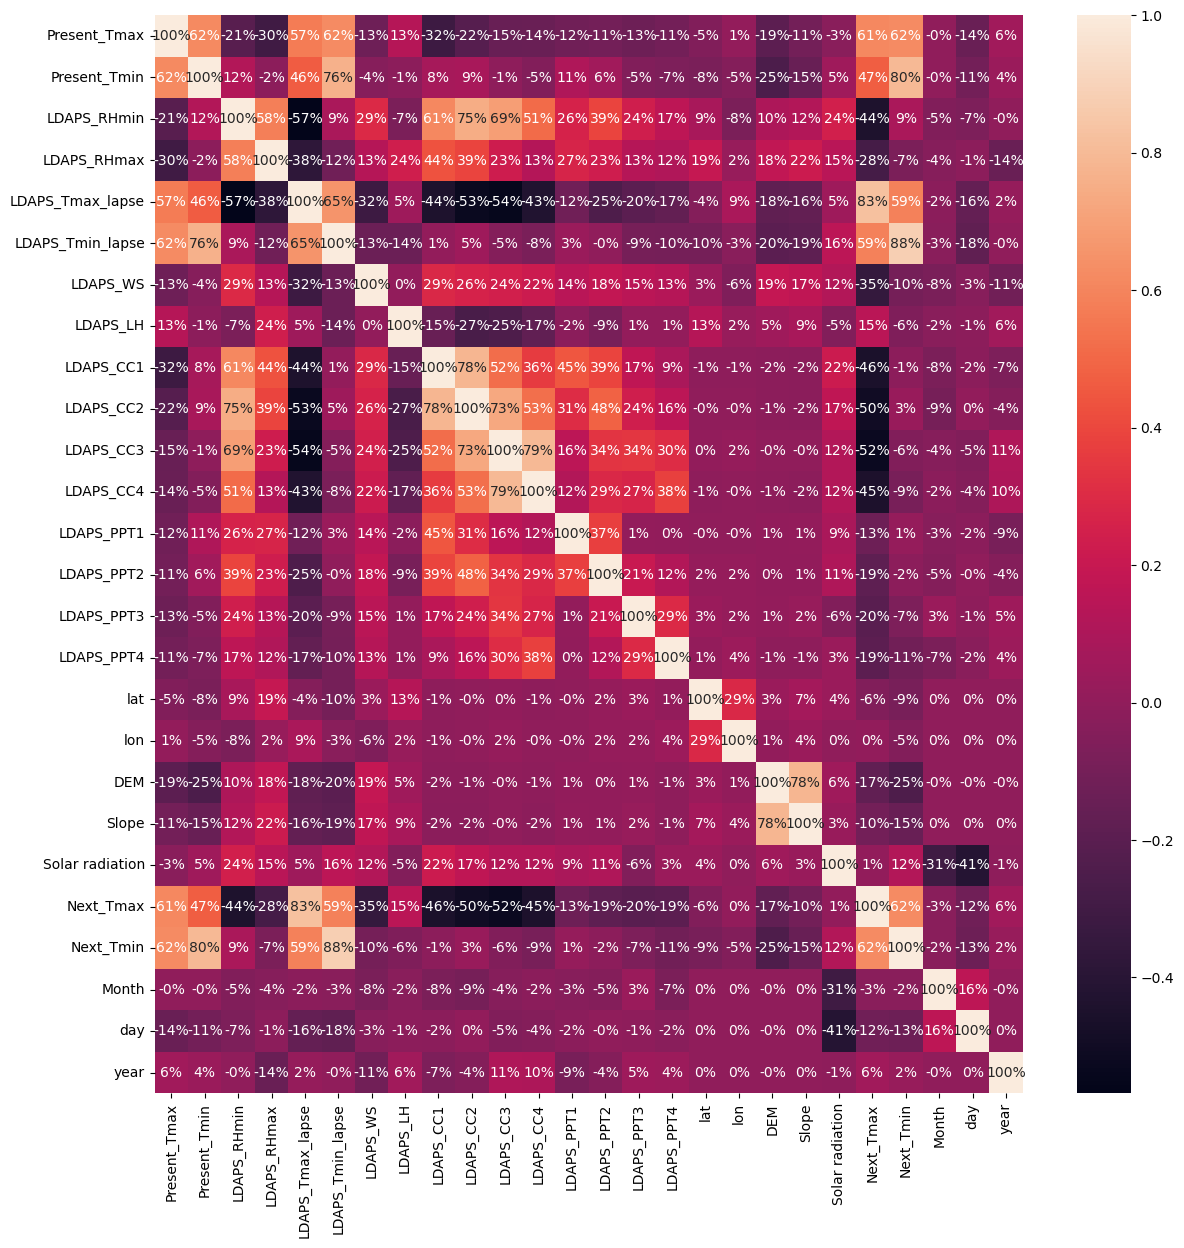

In [72]:
#Visualizing the correlation
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [73]:
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Month,day,year
count,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,...,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000
mean,29.769652,23.227316,56.742104,88.390831,29.614712,23.515389,7.091188,62.440791,0.368230,0.355625,...,37.544720,126.991400,61.854944,1.256692,5341.549330,30.276219,22.933419,7.080645,16.370968,2015.000000
std,2.953542,2.398383,14.586073,7.150356,2.928370,2.331006,2.167185,33.520913,0.261148,0.256752,...,0.050335,0.079406,54.256953,1.369833,428.996445,3.118022,2.478871,2.238364,8.241331,1.414305
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000,1.000000,7.000000,2013.000000
25%,27.800000,21.700000,46.048225,84.318649,27.693733,22.115268,5.686498,37.547426,0.148339,0.142424,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,7.000000,8.000000,2014.000000
50%,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,7.000000,16.000000,2015.000000
75%,32.000000,24.875000,67.032715,93.703491,31.682567,25.133460,8.005363,83.891182,0.571665,0.554910,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,8.000000,24.000000,2016.000000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000,12.000000,31.000000,2017.000000


Observations:
    1. outliers are present in various columns because of diffrence between 75% and Max.
    2. data is skewed because of mean> median or median>mean in some columns.

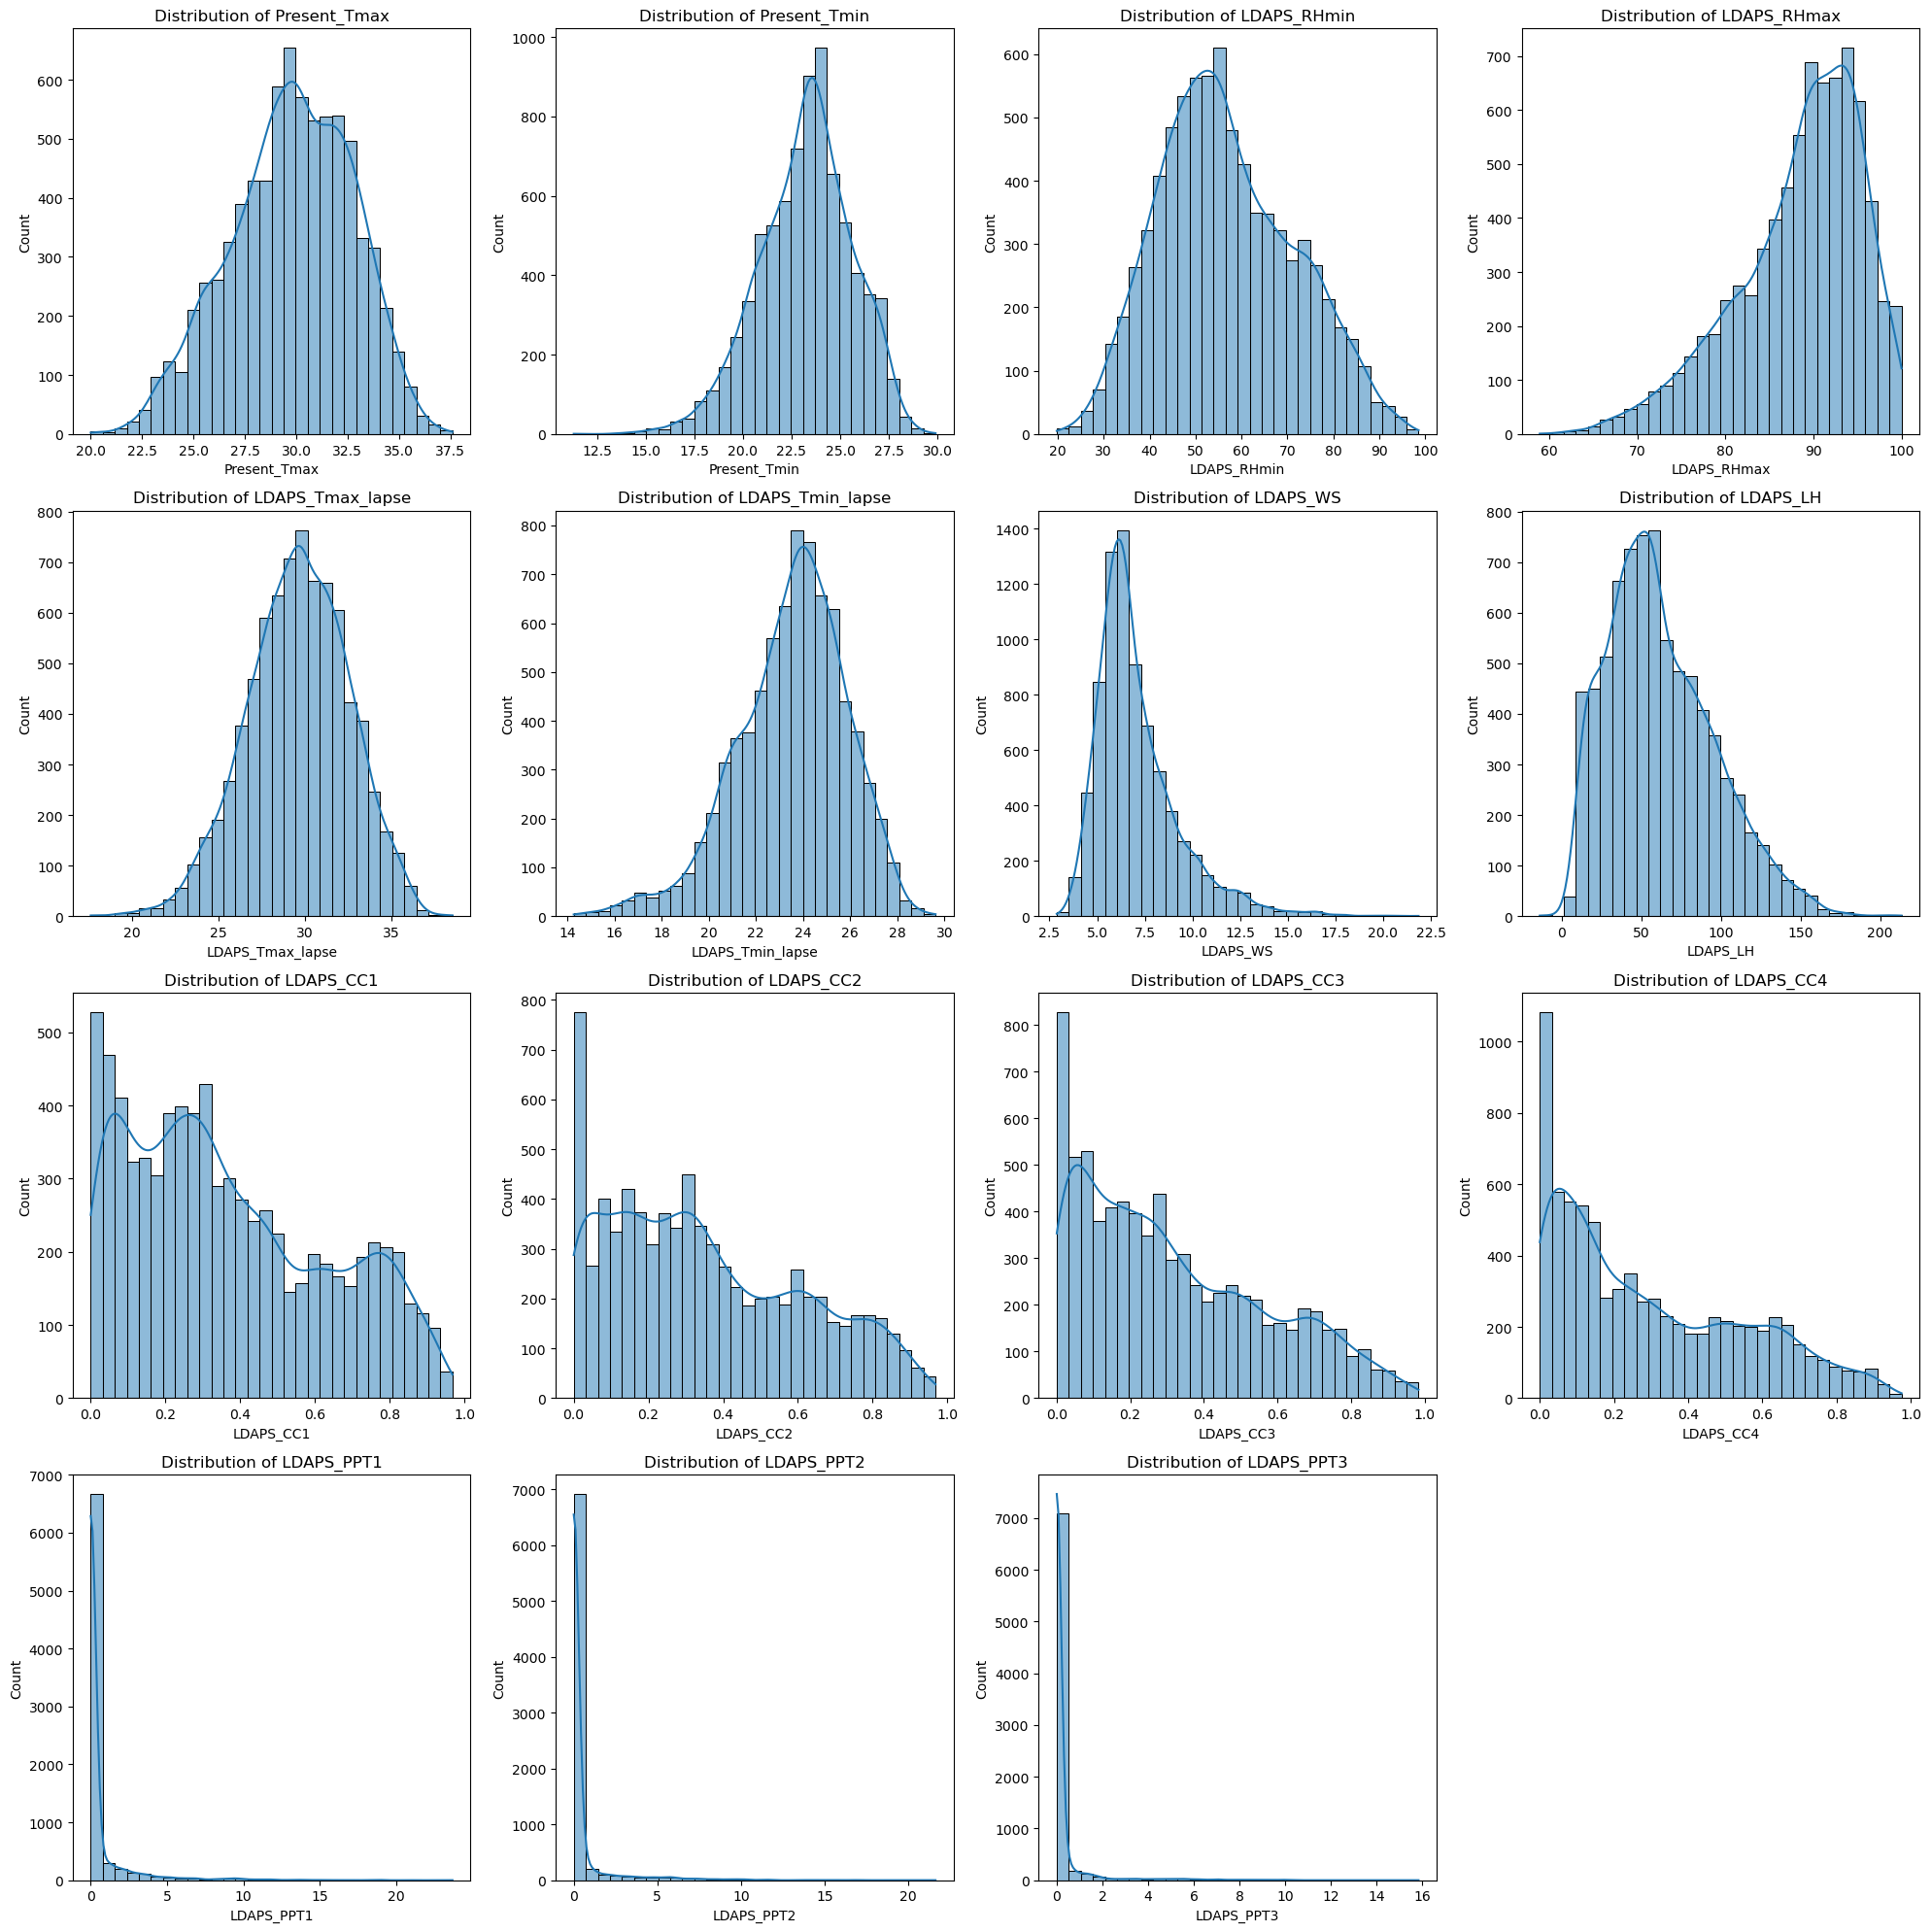

In [74]:
#checking  whether the graph is right skewed, left skewed or the graph is normally distributed graph
plt.figure(figsize=(20,20 ))
plotnumber=1
for i in df.columns[0:15]:
    if plotnumber<=16:
        plt.subplot(4, 4, plotnumber)
        sns.histplot(df[i], kde=True, bins=30)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

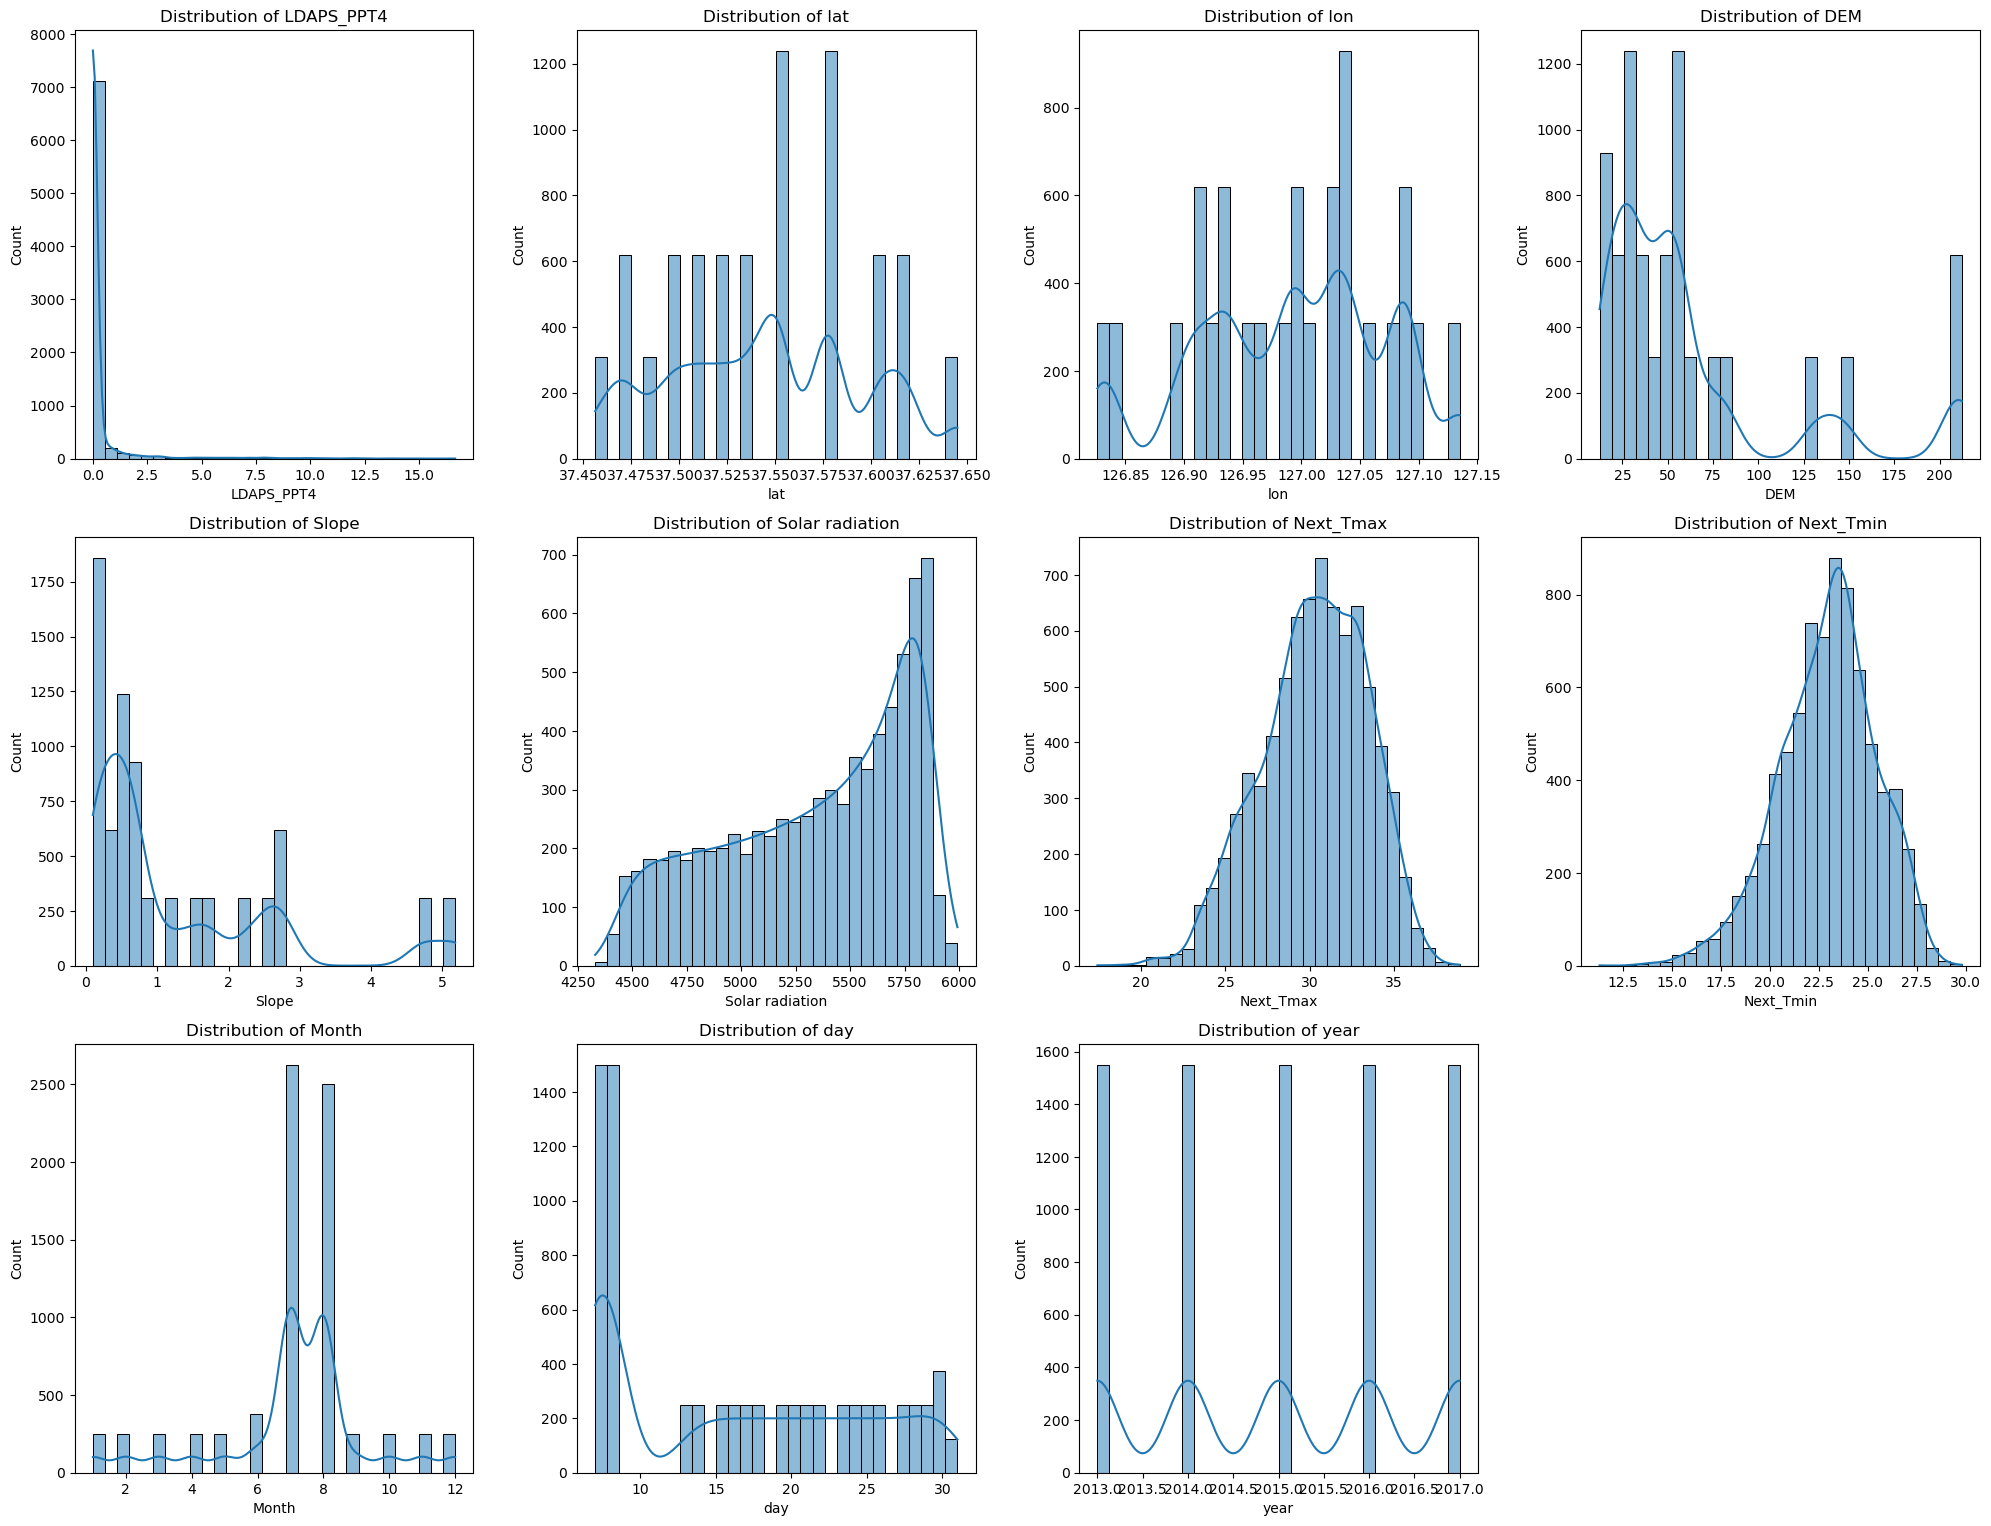

In [75]:

plt.figure(figsize=(20,20 ))
plotnumber=1
for i in df.columns[15:30]:
    if plotnumber<=16:
        plt.subplot(4, 4, plotnumber)
        sns.histplot(df[i], kde=True, bins=30)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

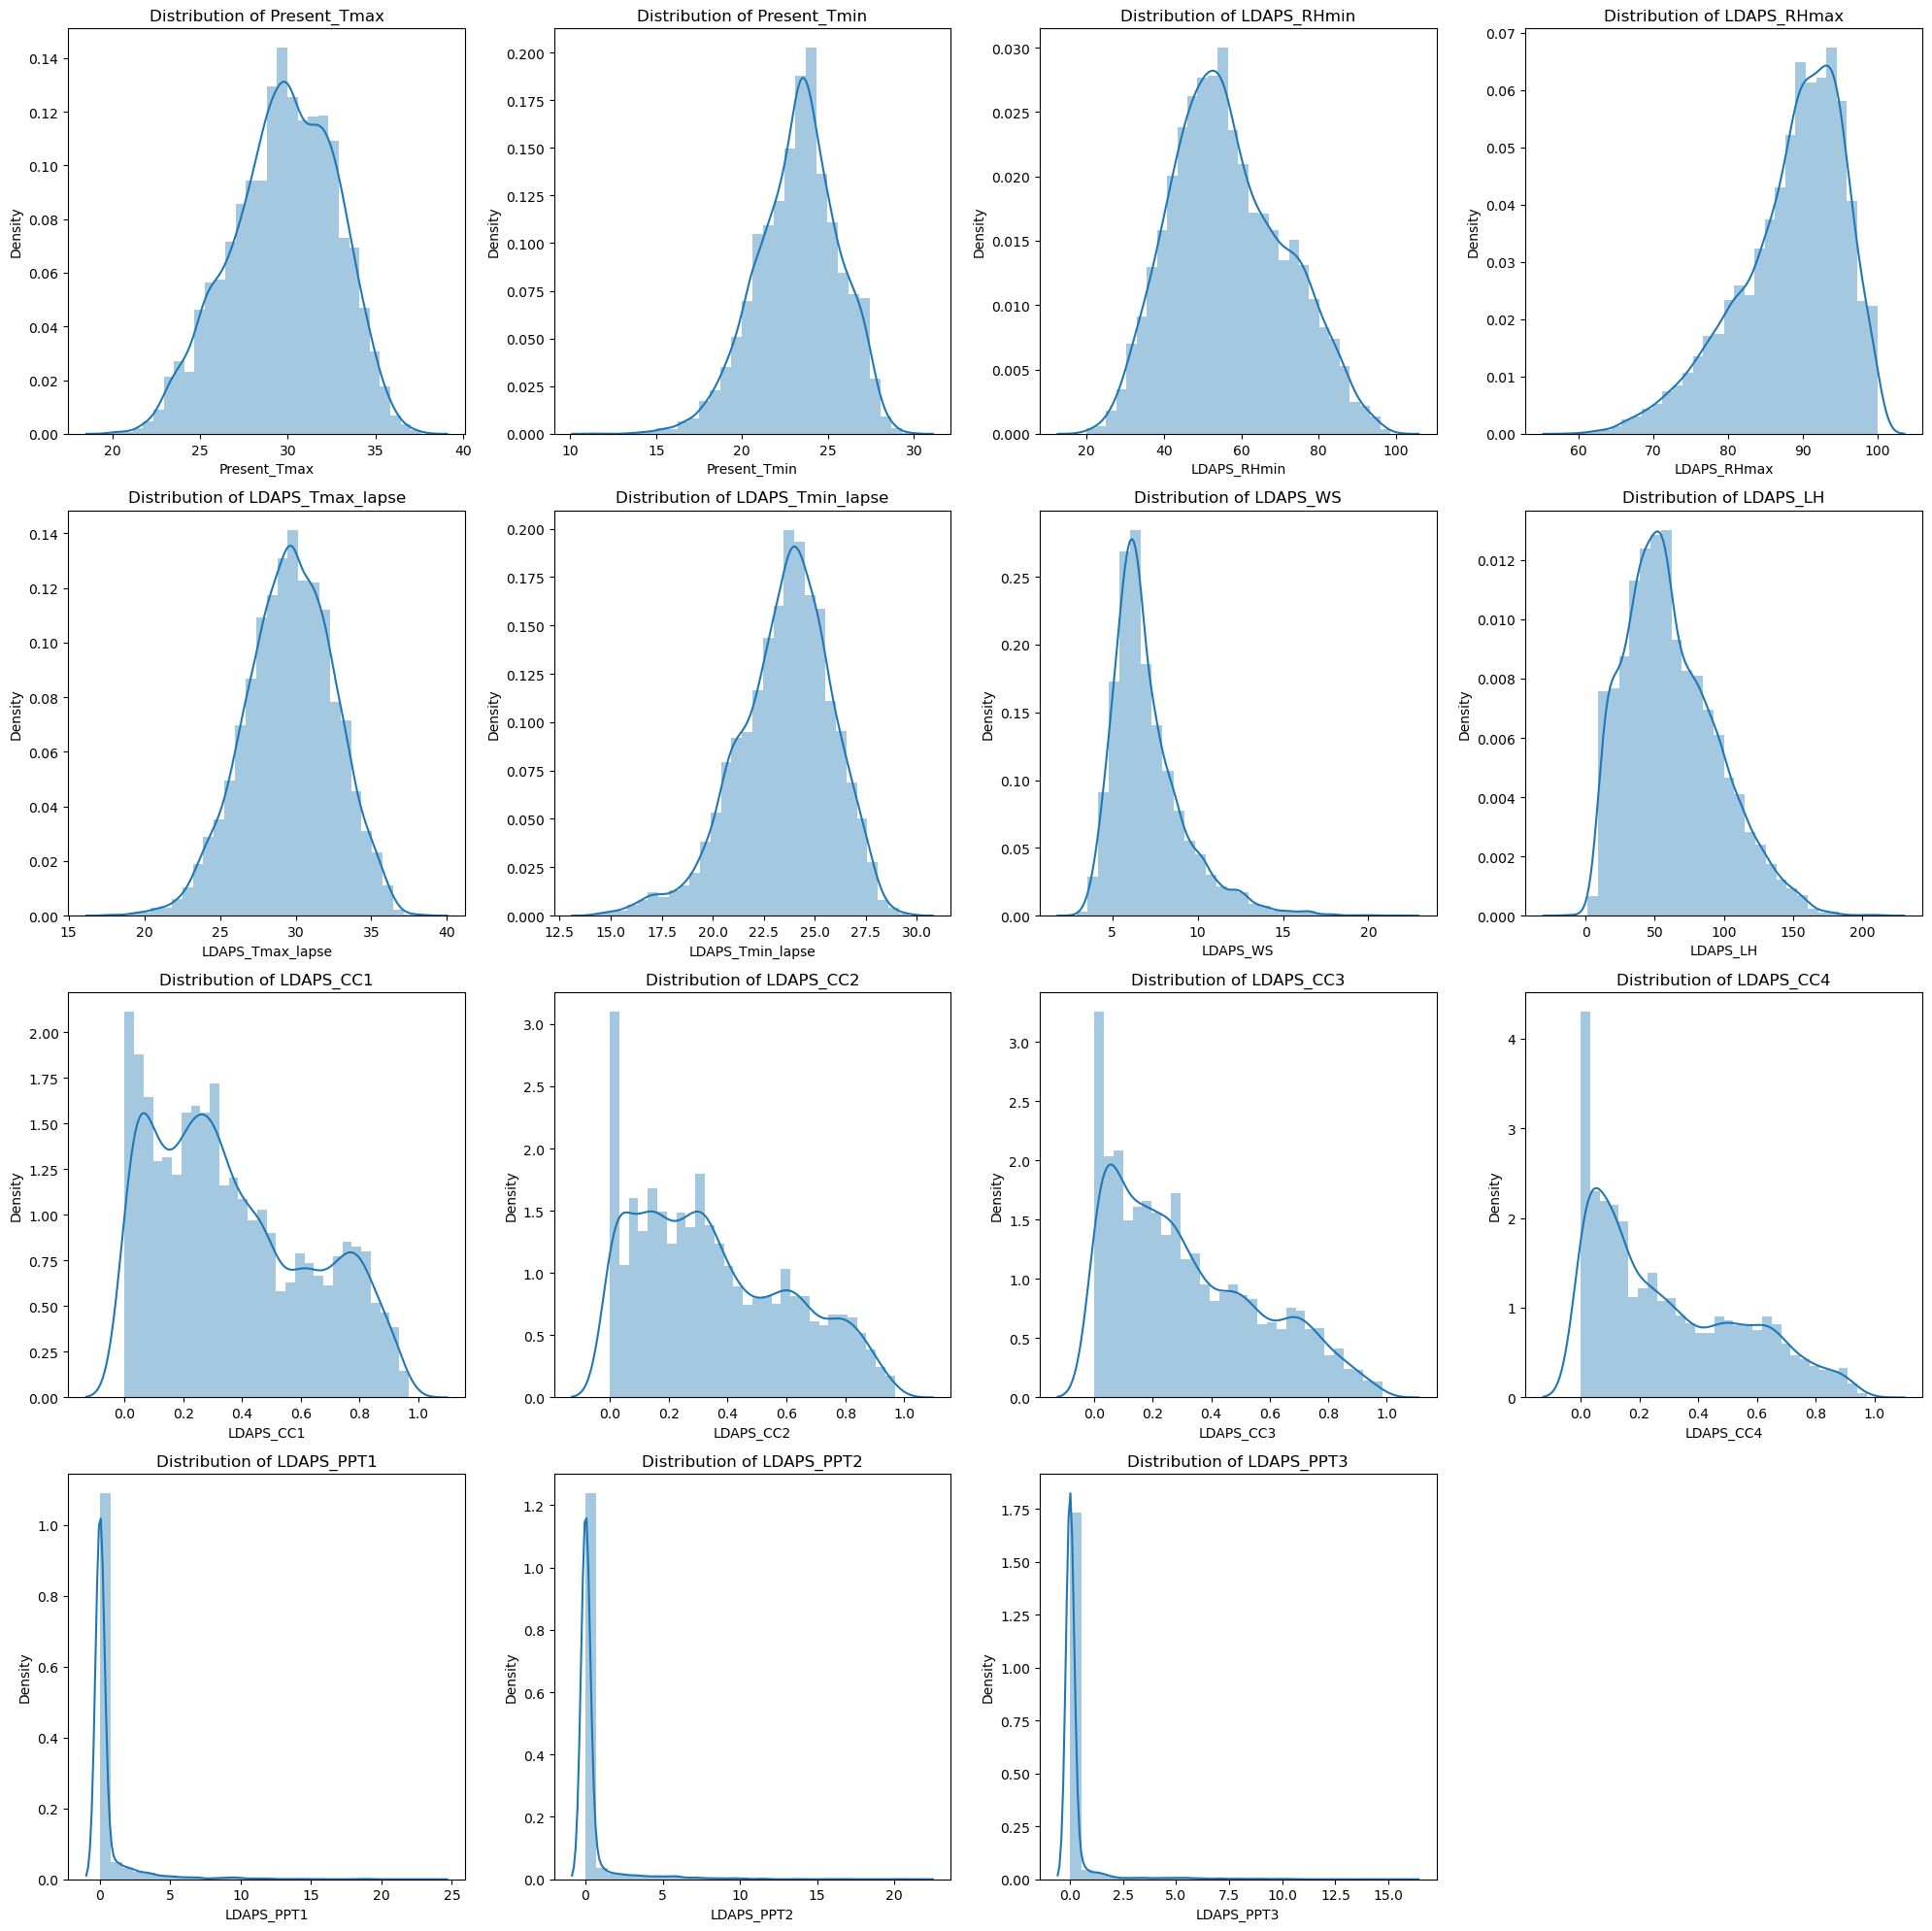

In [76]:
plt.figure(figsize=(20,20 ))
plotnumber=1
for i in df.columns[0:15]:
    if plotnumber<=16:
        plt.subplot(4, 4, plotnumber)
        sns.distplot(df[i], kde=True, bins=30)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

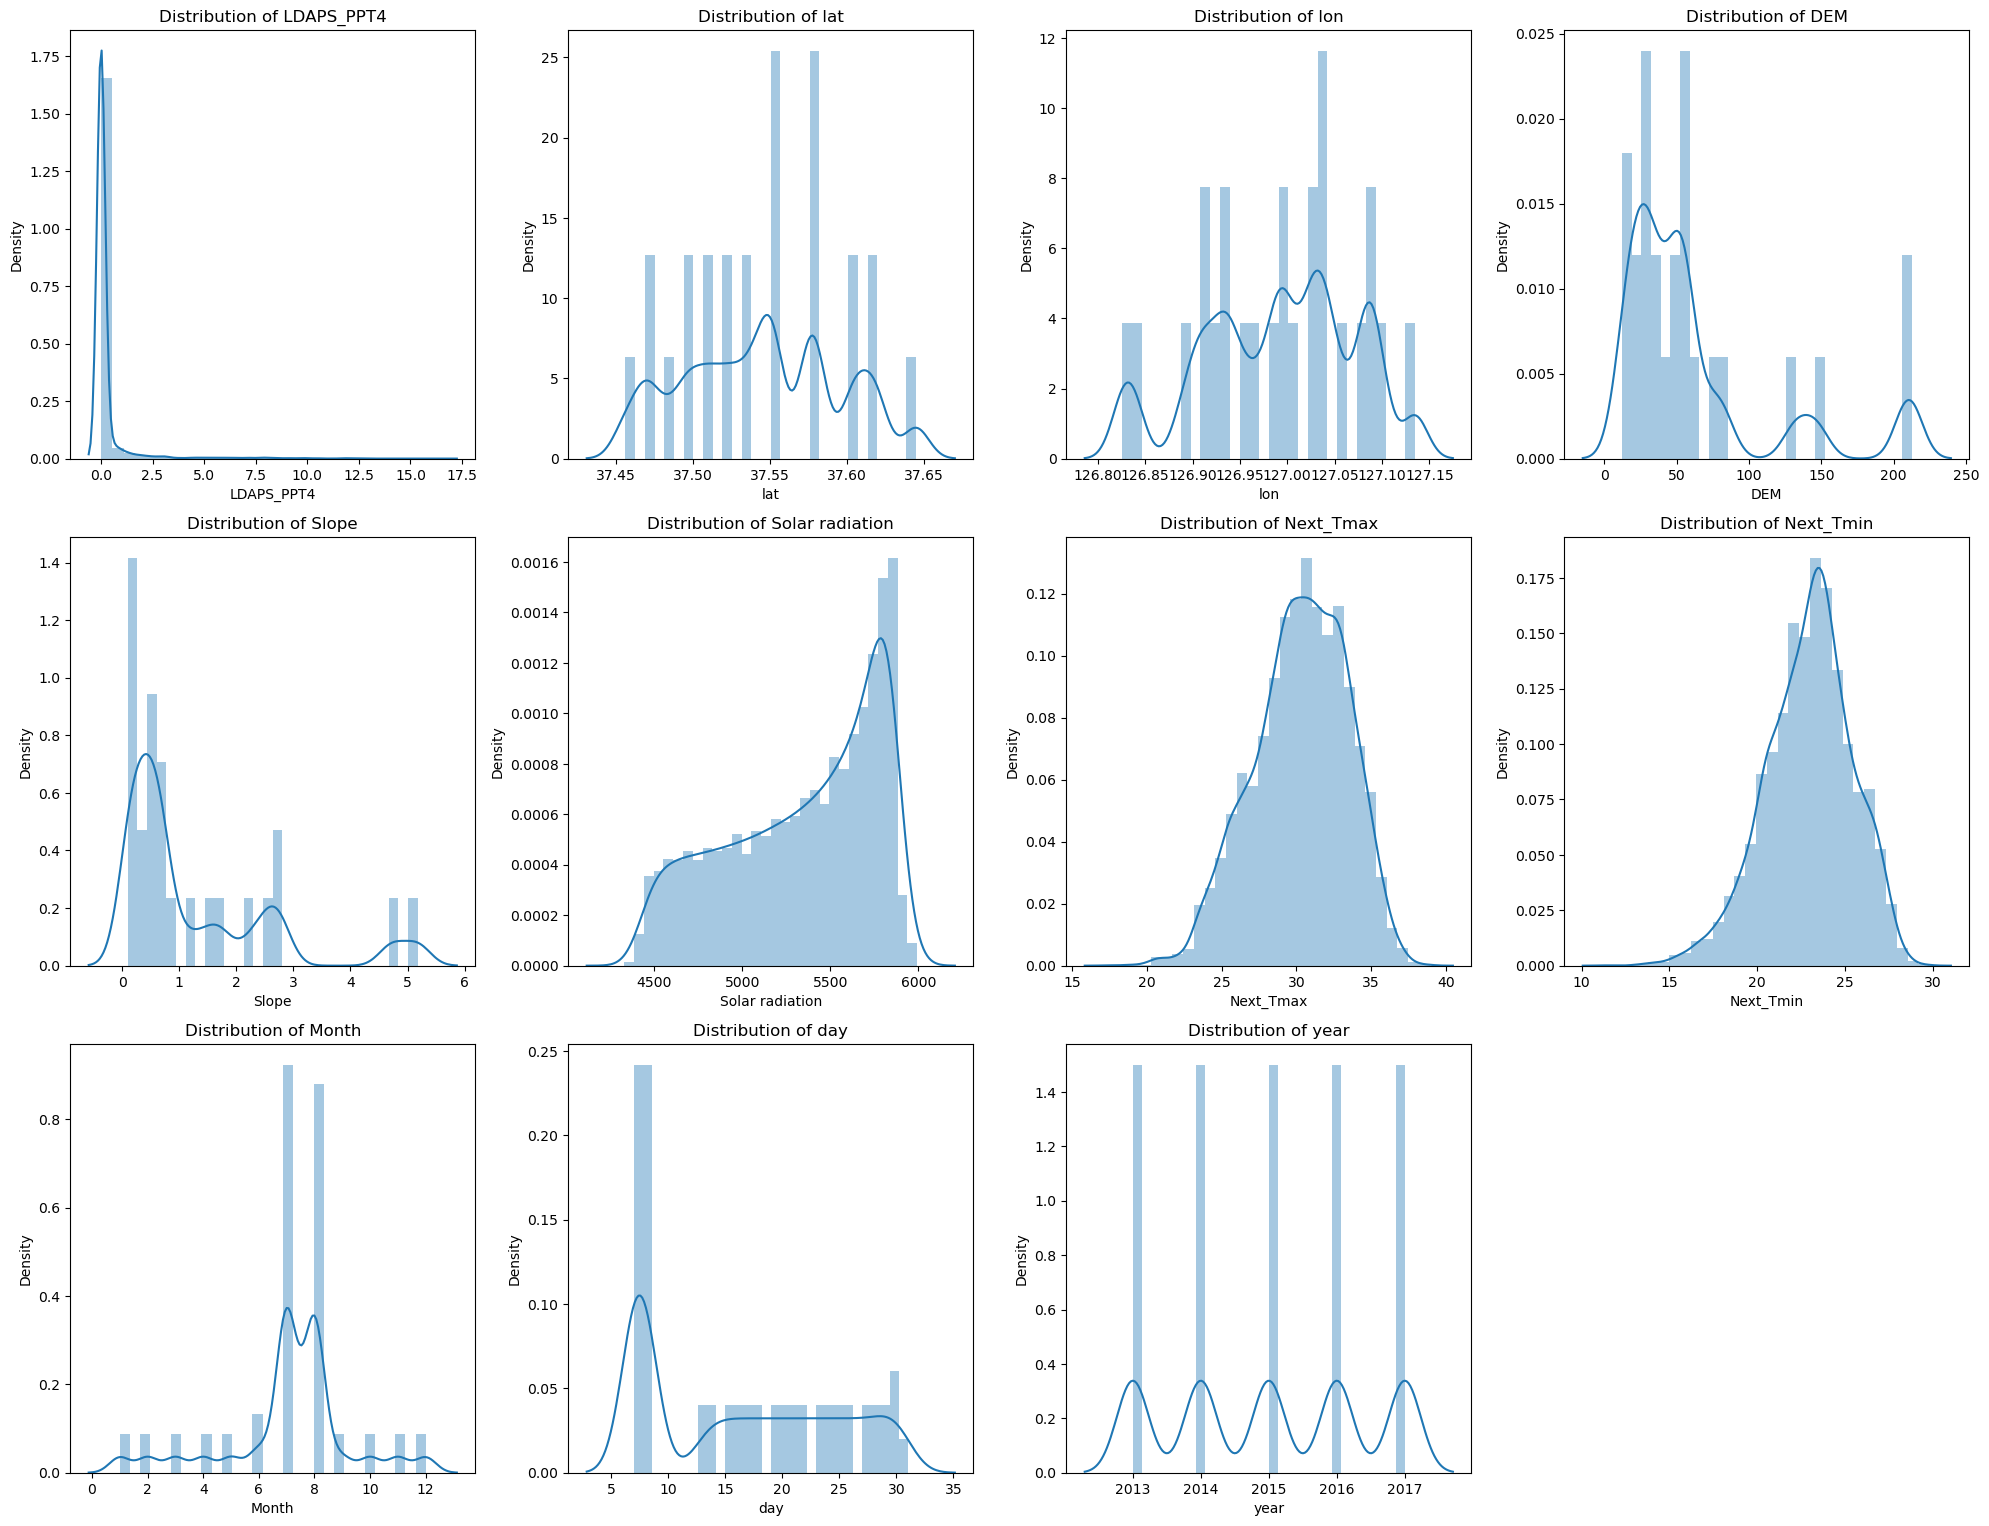

In [77]:

plt.figure(figsize=(20,20 ))
plotnumber=1
for i in df.columns[15:30]:
    if plotnumber<=16:
        plt.subplot(4, 4, plotnumber)
        sns.distplot(df[i], kde=True, bins=30)
        plt.title(f'Distribution of {i}')
        plt.xlabel(i)
    plotnumber+=1
plt.tight_layout()
plt.show()

Present_Tmax            Axes(0.125,0.77;0.133621x0.11)
Present_Tmin         Axes(0.285345,0.77;0.133621x0.11)
LDAPS_RHmin           Axes(0.44569,0.77;0.133621x0.11)
LDAPS_RHmax          Axes(0.606034,0.77;0.133621x0.11)
LDAPS_Tmax_lapse     Axes(0.766379,0.77;0.133621x0.11)
LDAPS_Tmin_lapse       Axes(0.125,0.638;0.133621x0.11)
LDAPS_WS            Axes(0.285345,0.638;0.133621x0.11)
LDAPS_LH             Axes(0.44569,0.638;0.133621x0.11)
LDAPS_CC1           Axes(0.606034,0.638;0.133621x0.11)
LDAPS_CC2           Axes(0.766379,0.638;0.133621x0.11)
LDAPS_CC3              Axes(0.125,0.506;0.133621x0.11)
LDAPS_CC4           Axes(0.285345,0.506;0.133621x0.11)
LDAPS_PPT1           Axes(0.44569,0.506;0.133621x0.11)
LDAPS_PPT2          Axes(0.606034,0.506;0.133621x0.11)
LDAPS_PPT3          Axes(0.766379,0.506;0.133621x0.11)
LDAPS_PPT4             Axes(0.125,0.374;0.133621x0.11)
lat                 Axes(0.285345,0.374;0.133621x0.11)
lon                  Axes(0.44569,0.374;0.133621x0.11)
DEM       

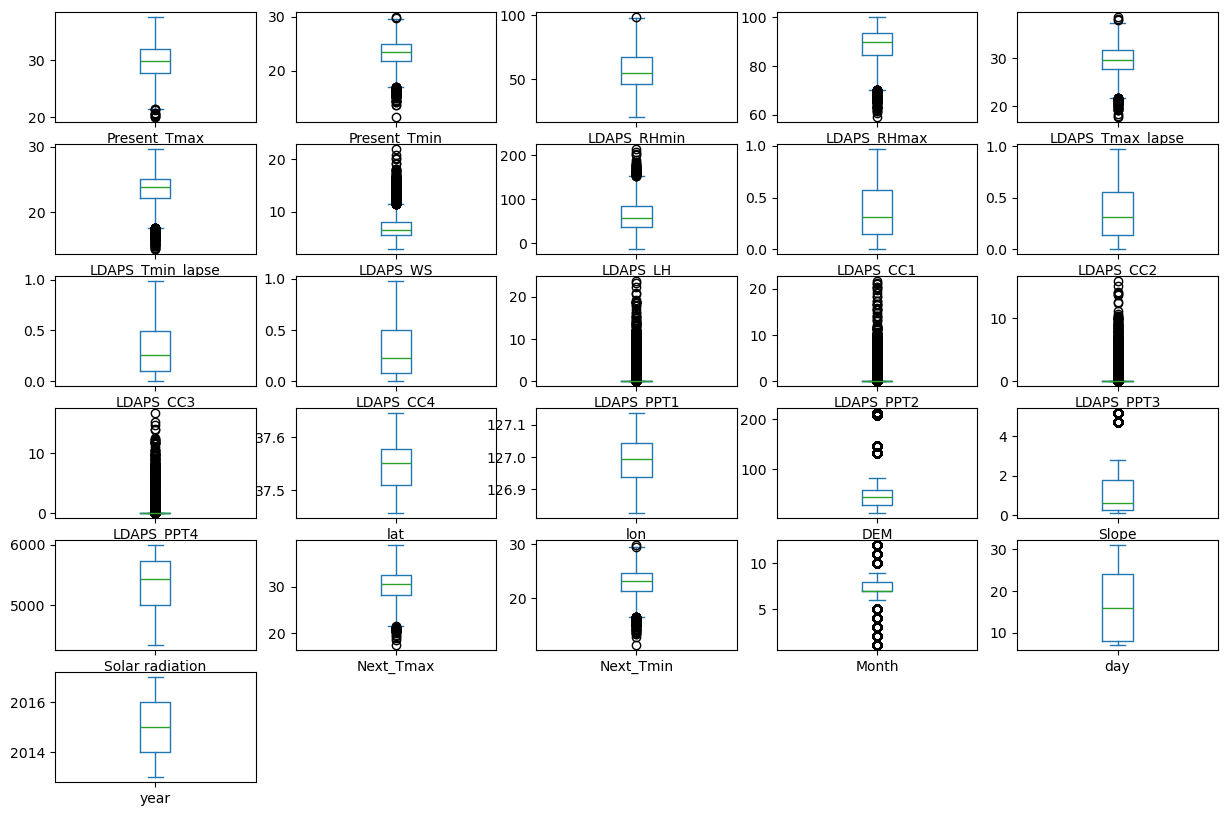

In [78]:
#Checking for outliers using boxplots
df.plot(kind='box',subplots=True,layout=(6,5),figsize=(15,10))

In [83]:
#Checking the skewness in data
df.skew()

Present_Tmax       -0.264215
Present_Tmin       -0.359513
LDAPS_RHmin         0.303578
LDAPS_RHmax        -0.855863
LDAPS_Tmax_lapse   -0.225096
LDAPS_Tmin_lapse   -0.582013
LDAPS_WS            1.562204
LDAPS_LH            0.672151
LDAPS_CC1           0.464742
LDAPS_CC2           0.476659
LDAPS_CC3           0.646029
LDAPS_CC4           0.673054
LDAPS_PPT1          5.325873
LDAPS_PPT2          5.714821
LDAPS_PPT3          6.370279
LDAPS_PPT4          6.744793
lat                 0.086942
lon                -0.285300
DEM                 1.723944
Slope               1.563346
Solar radiation    -0.511006
Next_Tmax          -0.336700
Next_Tmin          -0.397570
Month              -0.705241
day                 0.245482
year                0.000000
dtype: float64

In [84]:
#Removing skewness
skew=('LDAPS_WS','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope')
for i in skew:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [85]:
# Again checking the skewness in data
df.skew()

Present_Tmax       -0.264215
Present_Tmin       -0.359513
LDAPS_RHmin         0.303578
LDAPS_RHmax        -0.855863
LDAPS_Tmax_lapse   -0.225096
LDAPS_Tmin_lapse   -0.582013
LDAPS_WS            0.688281
LDAPS_LH            0.672151
LDAPS_CC1           0.464742
LDAPS_CC2           0.476659
LDAPS_CC3           0.391299
LDAPS_CC4           0.448623
LDAPS_PPT1          2.761933
LDAPS_PPT2          3.191987
LDAPS_PPT3          4.008174
LDAPS_PPT4          4.224781
lat                 0.086942
lon                -0.285300
DEM                 0.443948
Slope               0.836180
Solar radiation    -0.511006
Next_Tmax          -0.336700
Next_Tmin          -0.397570
Month              -0.705241
day                 0.245482
year                0.000000
dtype: float64

In [86]:
#Removing outliers using zscore
z=np.abs(zscore(df))
print(z)

      Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0         0.362182      0.761944     0.103776     0.381199          0.526132   
1         0.721332      0.678549     0.307073     0.309639          0.080588   
2         0.619753      0.030307     0.552043     0.617806          0.162756   
3         0.755192      0.072005     0.102686     1.131885          0.030707   
4         0.552033      0.553457     0.038944     0.246758          0.171020   
...            ...           ...          ...          ...               ...   
7745      2.258333      2.263052     2.197656     1.416727          0.615404   
7746      2.461492      2.429842     1.827014     0.657466          0.993725   
7747      2.190613      2.554934     2.056944     1.331624          1.114218   
7748      2.190613      2.304750     2.242110     1.551891          0.889466   
7749      2.224473      2.429842     2.318052     1.559056          0.572095   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS

In [87]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([   0,    0,    0, ..., 7749, 7749, 7749]), array([ 0,  1,  2, ..., 23, 24, 25]))
(7750, 26)


In [88]:
#Assign the value to df1 which are less than threshold value and removing outliers
df1=df[(z<3).all(axis=1)]

In [89]:
df1.shape

(6697, 26)

In [90]:
print(df.shape)
print(df1.shape)
print('Shape after removing outliers:',df1.shape)

(7750, 26)
(6697, 26)
Shape after removing outliers: (6697, 26)


In [91]:
#%data loss calculation
loss_percent=((7750-6697)/7750)*100
print(loss_percent)

13.587096774193549


13% data loss is not acceptable. we will proceed further without removing the outliers.


In [93]:
#Splitting the independent and target variable in x and y1,y2 
x=df.drop(['Next_Tmax', 'Next_Tmin'],axis=1)
y1=df['Next_Tmax']
y2=df['Next_Tmin']

In [94]:
x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Month,day,year
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.056542,69.451805,0.233947,0.203896,...,0.0,0.0,37.6046,126.991,5.362864,1.331046,5992.895996,6.0,30.0,2013.0
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.900896,51.937448,0.225508,0.251771,...,0.0,0.0,37.6046,127.032,3.823463,0.414821,5869.312500,6.0,30.0,2013.0
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.965464,20.573050,0.209344,0.257469,...,0.0,0.0,37.5776,127.058,3.535344,0.235941,5863.555664,6.0,30.0,2013.0
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.894624,65.727144,0.216372,0.226002,...,0.0,0.0,37.6450,127.022,3.844087,1.262657,5856.964844,6.0,30.0,2013.0
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.907318,107.965535,0.151407,0.249995,...,0.0,0.0,37.5507,127.135,3.584574,0.409125,5859.552246,6.0,30.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,2.028576,9.614074,0.052902,0.030169,...,0.0,0.0,37.5507,127.040,3.306813,0.452412,4456.024414,8.0,30.0,2017.0
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.912218,82.146707,0.066461,0.024518,...,0.0,0.0,37.5102,127.086,3.134050,0.125045,4441.803711,8.0,30.0,2017.0
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.966961,72.058294,0.030034,0.081035,...,0.0,0.0,37.5372,126.891,2.808655,0.144447,4443.313965,8.0,30.0,2017.0
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,2.020596,47.241457,0.035874,0.074962,...,0.0,0.0,37.5237,126.909,2.906661,0.200734,4438.373535,8.0,30.0,2017.0


In [95]:
y1

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7750, dtype: float64

In [96]:
y2

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7750, dtype: float64

In [97]:
# Combine the target variables into a DataFrame
y = pd.DataFrame({'y1': y1, 'y2': y2})

In [98]:
#Using StandardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [99]:
#Finding best Random state
maxR2S=0
maxRS=0
for i in range(50,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    r2score=r2_score(y_test,predlr)
    if r2score>maxR2S:
        maxR2S=r2score
        maxRS=i
print('Best accuracy is',maxR2S,'on Random_state',maxRS)

Best accuracy is 0.8105117309824472 on Random_state 90


In [100]:
#Model Building
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=90)

In [105]:
print(y_train)

        y1    y2
6171  24.6  19.1
2705  30.7  22.6
3107  26.7  20.0
3990  32.4  23.9
399   30.0  26.1
...    ...   ...
1347  29.8  22.5
6815  33.5  23.7
5746  35.6  27.4
2717  32.3  21.9
3931  31.0  25.7

[5425 rows x 2 columns]


# Build the Model for Next_Tmax

In [109]:
model=[LinearRegression(),DecisionTreeRegressor(),ExtraTreeRegressor(),KNeighborsRegressor(),SVR(), AdaBoostRegressor(),GradientBoostingRegressor(),RandomForestRegressor(), Lasso(alpha=.00001),Ridge(alpha=.00001),ElasticNet(alpha=.00001)]
for m1 in model:
    m1.fit(x_train,y_train['y1'])
    predm1=m1.predict(x_test)
    print("error:")
    print("Mean squared error:", mean_squared_error(y_test['y1'], predm1))
    print("Mean absolute error:", mean_absolute_error(y_test['y1'], predm1))
    print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test['y1'], predm1)))
    print("R2 Score of ",m1,"is: ",r2_score(y_test['y1'], predm1))
    sc=cross_val_score(m1,x,y1,cv=5,scoring='r2')
    print('Cross validation score of',m1,"is: ",sc.mean())
    print("Difference between r2 score and cross validation score is", r2_score(y_test['y1'], predm1)-sc.mean())
    print()
    print()
    print()
    print() 

error:
Mean squared error: 2.165806709214407
Mean absolute error: 1.1192073492331833
Root Mean squared error: 1.4716680023749946
R2 Score of  LinearRegression() is:  0.78174183915841
Cross validation score of LinearRegression() is:  0.676239069350914
Difference between r2 score and cross validation score is 0.10550276980749596




error:
Mean squared error: 2.144494623655914
Mean absolute error: 1.0378064516129033
Root Mean squared error: 1.4644093087849155
R2 Score of  DecisionTreeRegressor() is:  0.7838895546391615
Cross validation score of DecisionTreeRegressor() is:  0.45070202883275723
Difference between r2 score and cross validation score is 0.3331875258064043




error:
Mean squared error: 2.192752688172043
Mean absolute error: 1.0496774193548386
Root Mean squared error: 1.4807946137706076
R2 Score of  ExtraTreeRegressor() is:  0.7790263706983908
Cross validation score of ExtraTreeRegressor() is:  0.3563893777968855
Difference between r2 score and cross validation score is 0.422

KneighborsRegressor has the highest r2 score which is 90% (this may be due to overfitting). so we also checked the cross validation for actual accuracy. After Cross Validation, we found out that the minimum difference between the r2 score and cross validation score is .10 which is given by Linear Regression but we used the Lasso regularization technique. Final model is Lasso Regularization which has the 78% actual accuracy (r2 score).

In [111]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train['y1'])
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [113]:
ls=Lasso(alpha=.0001,random_state=0)
ls.fit(x_train,y_train['y1'])
ls.score(x_train,y_train['y1'])
pred_ls=ls.predict(x_test)
lss=r2_score(y_test['y1'],pred_ls)
print(lss)

0.7817332404385046


# Build the Model for Next_Tmin

In [114]:
model=[LinearRegression(),DecisionTreeRegressor(),ExtraTreeRegressor(),KNeighborsRegressor(),SVR(), AdaBoostRegressor(),GradientBoostingRegressor(),RandomForestRegressor(), Lasso(alpha=.00001),Ridge(alpha=.00001),ElasticNet(alpha=.00001)]
for m2 in model:
    m2.fit(x_train,y_train['y2'])
    predm2=m2.predict(x_test)
    print("error:")
    print("Mean squared error:", mean_squared_error(y_test['y2'], predm2))
    print("Mean absolute error:", mean_absolute_error(y_test['y2'], predm2))
    print("Root Mean squared error:", np.sqrt(mean_squared_error(y_test['y2'], predm2)))
    print("R2 Score of ",m2,"is: ",r2_score(y_test['y2'], predm2))
    sc=cross_val_score(m2,x,y2,cv=5,scoring='r2')
    print('Cross validation score of',m2,"is: ",sc.mean())
    print("Difference between r2 score and cross validation score is", r2_score(y_test['y2'], predm2)-sc.mean())
    print()
    print()
    print()
    print() 

error:
Mean squared error: 0.9890340363142599
Mean absolute error: 0.7781729770203776
Root Mean squared error: 0.9945019036252569
R2 Score of  LinearRegression() is:  0.8392816228064839
Cross validation score of LinearRegression() is:  0.7684146923049667
Difference between r2 score and cross validation score is 0.07086693050151716




error:
Mean squared error: 1.4651655913978496
Mean absolute error: 0.8844301075268818
Root Mean squared error: 1.2104402469340854
R2 Score of  DecisionTreeRegressor() is:  0.7619100783965148
Cross validation score of DecisionTreeRegressor() is:  0.5555684706658909
Difference between r2 score and cross validation score is 0.20634160773062393




error:
Mean squared error: 1.4050064516129033
Mean absolute error: 0.8710537634408603
Root Mean squared error: 1.1853296805584947
R2 Score of  ExtraTreeRegressor() is:  0.7716859596752075
Cross validation score of ExtraTreeRegressor() is:  0.5025511464099448
Difference between r2 score and cross validation score is

RandomForestRegressor has the highest r2 score which is 91% (this may be due to overfitting). so we also checked the cross validation for actual accuracy. After Cross Validation, we found out that the minimum difference between the r2 score and cross validation score is .07 which is given by Linear Regression but we used the Lasso regularization technique. Final model is Lasso which has the 84% actual accuracy (r2 score).

In [115]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls1=Lasso()
clf1=GridSearchCV(ls1,parameters)
clf1.fit(x_train,y_train['y2'])
print(clf1.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [116]:
ls1=Lasso(alpha=.001,random_state=0)
ls1.fit(x_train,y_train['y2'])
ls1.score(x_train,y_train['y2'])
pred_ls1=ls1.predict(x_test)
lss1=r2_score(y_test['y2'],pred_ls1)
print(lss1)

0.8393210560373165


In [117]:
from sklearn.multioutput import MultiOutputRegressor

In [118]:
# Combine the separately tuned models into a single multi-output model
multi_output_lasso = MultiOutputRegressor(estimator=Lasso())
multi_output_lasso.estimators_ = [ls, ls1]

In [119]:
# Save the combined model
        
import pickle
filename="temperature_forecast_multi_output_lasso.pkl"
pickle.dump(multi_output_lasso,open(filename,'wb'))

In [120]:
# Load the model

import pickle
loaded_model=pickle.load(open('temperature_forecast_multi_output_lasso.pkl','rb'))
print("Model loaded successfully")


Model loaded successfully


In [121]:
# Make predictions with the loaded model
y_pred = loaded_model.predict(x_test)
print(y_pred)
result=loaded_model.score(x_test,y_test)
print(result*100)

[[36.0381379  25.05233529]
 [27.51032213 20.20718567]
 [25.17754698 20.14819341]
 ...
 [30.59771586 21.83253525]
 [31.03724413 25.3117053 ]
 [28.89073408 23.11953198]]
81.05271482379106


In [128]:
# Create a DataFrame for the comparison
conclusion = pd.DataFrame({
    "NextTmax_pred": y_pred[:, 0],
    "NextTmin_pred": y_pred[:, 1],
    "NextTmax_orig": y_test["y1"].values,
    "NextTmin_orig": y_test["y2"].values
})

print(conclusion)

      NextTmax_pred  NextTmin_pred  NextTmax_orig  NextTmin_orig
0         36.038138      25.052335           35.4           23.5
1         27.510322      20.207186           29.5           20.2
2         25.177547      20.148193           26.8           20.4
3         26.961888      22.929273           26.8           23.8
4         32.140117      25.911506           34.0           26.2
...             ...            ...            ...            ...
2320      32.447890      26.657713           32.3           27.3
2321      36.241154      26.965882           35.0           26.8
2322      30.597716      21.832535           30.9           23.4
2323      31.037244      25.311705           32.8           24.3
2324      28.890734      23.119532           29.8           23.4

[2325 rows x 4 columns]
